In [7]:
import pandas as pd
import numpy as np

from src.utils import get_traffic_locations_df, get_air_locations_df
from pyhandy.datautils import get_data_summary

In [8]:
pmed_trafico_ubicaciones = get_traffic_locations_df(data_dir="../01-data")
aire_ubicaciones = get_air_locations_df(data_dir="../01-data")
traffic_df_interim = pd.read_feather("../01-data/interim/traffic_df.feather")
traffic_df_interim

,id,fecha,intensidad,ocupacion,vmed,periodo_integracion,carga
0,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 04:00:00,32.50,0.00,0.0,15.00,0.50
1,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 05:00:00,53.25,0.00,0.0,15.00,0.75
2,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 06:00:00,479.50,4.50,0.0,14.50,13.00
3,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 07:00:00,2057.25,29.00,0.0,15.00,64.00
4,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 09:00:00,1825.75,21.00,0.0,15.00,61.75
...,...,...,...,...,...,...,...
113561899,Ángel Luis Herrán - Valdetorres del Jarama-Lóp...,2021-09-30 19:00:00,151.75,7.75,0.0,15.00,31.00
113561900,Ángel Luis Herrán - Valdetorres del Jarama-Lóp...,2021-09-30 20:00:00,121.00,6.25,0.0,14.75,25.50
113561901,Ángel Luis Herrán - Valdetorres del Jarama-Lóp...,2021-09-30 21:00:00,93.75,6.00,0.0,14.75,20.75
113561902,Ángel Luis Herrán - Valdetorres del Jarama-Lóp...,2021-09-30 22:00:00,51.75,0.50,0.0,13.25,9.25


In [9]:
xls = pd.ExcelFile("../00-rawdata/ubicaciones.xlsx")
location_dataframe = pd.read_excel(xls)
location_dataframe["nombre"] = np.where(location_dataframe.nombre.isnull(),location_dataframe.cod_cent,location_dataframe.nombre)
traffic_info_df = location_dataframe[["cod_cent","nombre","id"]]
traffic_info_df = traffic_info_df.drop_duplicates(subset="nombre")
locations_dict = traffic_info_df.set_index("cod_cent").nombre.to_dict()
traffic_info_df

,cod_cent,nombre,id
0,01001,Jose Ortega y Gasset E-O - Pº Castellana-Serrano,3840
1,01002,Jose Ortega y Gasset O-E - Serrano-Pº Castellana,3841
2,01003,Pº Recoletos N-S - Almirante-Prim,3842
3,01004,Pº Recoletos S-N - Pl. Cibeles- Recoletos,3843
4,01005,(AFOROS) Pº Castellana S-N - Eduardo Dato - P...,3844
...,...,...,...
4522,PM43201,PM43201,6809
4523,PM43202,PM43202,6810
4524,PM43221,PM43221,6933
4525,PM43222,PM43222,7129


Añadir el codigo a el dataset de trafico para identificar con las ubicaciones

In [10]:
traffic_df = traffic_df_interim.rename(columns={"id":"nombre"})\
    .join(
        traffic_info_df.set_index("nombre"),
        on="nombre",how="left"
).reset_index(drop=True).astype({"fecha":"datetime64"})
traffic_df

,nombre,fecha,intensidad,ocupacion,vmed,periodo_integracion,carga,cod_cent,id
0,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 04:00:00,32.50,0.00,0.0,15.00,0.50,65016,6432
1,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 05:00:00,53.25,0.00,0.0,15.00,0.75,65016,6432
2,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 06:00:00,479.50,4.50,0.0,14.50,13.00,65016,6432
3,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 07:00:00,2057.25,29.00,0.0,15.00,64.00,65016,6432
4,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 09:00:00,1825.75,21.00,0.0,15.00,61.75,65016,6432
...,...,...,...,...,...,...,...,...,...
113561899,Ángel Luis Herrán - Valdetorres del Jarama-Lóp...,2021-09-30 19:00:00,151.75,7.75,0.0,15.00,31.00,56028,6308
113561900,Ángel Luis Herrán - Valdetorres del Jarama-Lóp...,2021-09-30 20:00:00,121.00,6.25,0.0,14.75,25.50,56028,6308
113561901,Ángel Luis Herrán - Valdetorres del Jarama-Lóp...,2021-09-30 21:00:00,93.75,6.00,0.0,14.75,20.75,56028,6308
113561902,Ángel Luis Herrán - Valdetorres del Jarama-Lóp...,2021-09-30 22:00:00,51.75,0.50,0.0,13.25,9.25,56028,6308


In [13]:
traffic_df.to_feather("../01-data/processed/traffic_data.feather")

Establecer latitud y longitud de cada punto

In [8]:
# Establecer latitud y longitud de cada punto
df = traffic_df.join(
    pmed_trafico_ubicaciones\
        .set_index("cod_cent")\
        .filter(items=['latitud','longitud']) ,
    on='cod_cent',
    how='left',
).dropna(subset=['latitud','longitud']).astype({"fecha":"datetime64"})
df

,nombre,fecha,intensidad,ocupacion,vmed,periodo_integracion,carga,cod_cent,id,latitud,longitud
0,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 04:00:00,32.50,0.00,0.0,15.00,0.50,65016,6432,40.409479,-3.63018
1,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 05:00:00,53.25,0.00,0.0,15.00,0.75,65016,6432,40.409479,-3.63018
2,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 06:00:00,479.50,4.50,0.0,14.50,13.00,65016,6432,40.409479,-3.63018
3,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 07:00:00,2057.25,29.00,0.0,15.00,64.00,65016,6432,40.409479,-3.63018
4,C/. Fuente Carrantona - Paular-José Bergamín,2016-04-01 09:00:00,1825.75,21.00,0.0,15.00,61.75,65016,6432,40.409479,-3.63018
...,...,...,...,...,...,...,...,...,...,...,...
113561899,Ángel Luis Herrán - Valdetorres del Jarama-Lóp...,2021-09-30 19:00:00,151.75,7.75,0.0,15.00,31.00,56028,6308,40.469907,-3.65075
113561900,Ángel Luis Herrán - Valdetorres del Jarama-Lóp...,2021-09-30 20:00:00,121.00,6.25,0.0,14.75,25.50,56028,6308,40.469907,-3.65075
113561901,Ángel Luis Herrán - Valdetorres del Jarama-Lóp...,2021-09-30 21:00:00,93.75,6.00,0.0,14.75,20.75,56028,6308,40.469907,-3.65075
113561902,Ángel Luis Herrán - Valdetorres del Jarama-Lóp...,2021-09-30 22:00:00,51.75,0.50,0.0,13.25,9.25,56028,6308,40.469907,-3.65075


---------
## Segmentar trafico usando ClaSP

In [2]:
%load_ext autoreload
%autoreload 2

from sktime.annotation.clasp import ClaSPSegmentation, find_dominant_window_sizes
from sktime.annotation.plotting.utils import (
    plot_time_series_with_change_points,
    plot_time_series_with_profiles,
)
import pandas as pd

traffic_df = pd.read_feather("../01-data/processed/traffic_df.feather")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
ts = ts_df.intensidad.copy() #.set_index("fecha")
dominant_period_size = find_dominant_window_sizes(ts)
clasp = ClaSPSegmentation(period_length=dominant_period_size, n_cps=1, fmt="dense")
found_segmentation = clasp.fit_predict(ts)
profiles = clasp.profiles
scores = clasp.scores
# print("The found change points are", found_cps.to_numpy())

In [7]:
ts_df["segment"] = 0
for i,interval in enumerate(found_segmentation.to_list()):
    ts_df.iloc[interval.left:interval.right,-1] = i
cps = pd.Series([interval.left for interval in found_segmentation if interval.left!=0 and interval.right!=(len(ts_df)-1)]).unique()
change_points_df = ts_df.iloc[cps].copy()
change_points_df["scores"] = scores
change_points_df

,fecha,intensidad,segment,scores
1117,2019-05-17,704.208333,1,0.533658


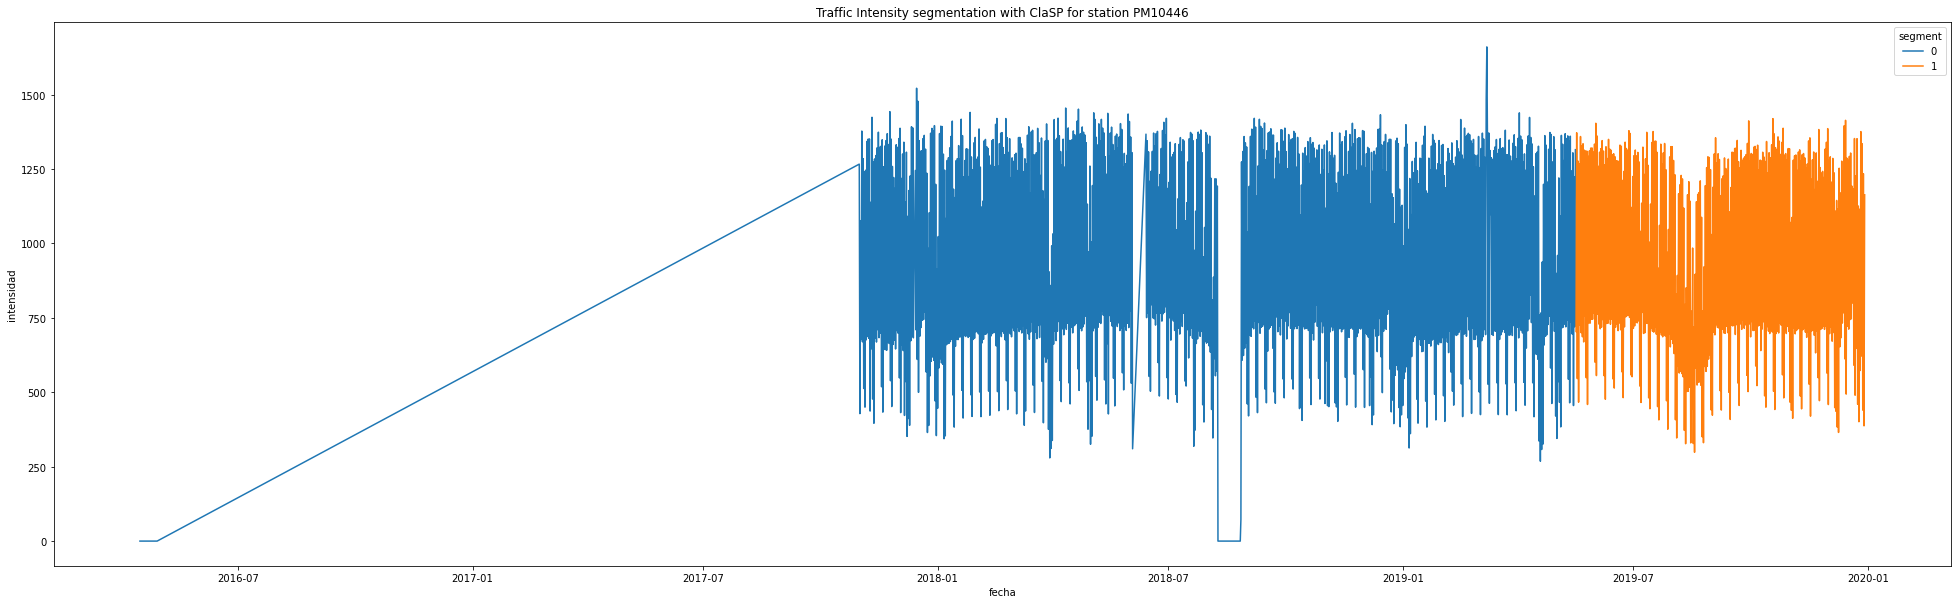

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(34,10))
# ts_df.plot(x="fecha",y="intensidad",ax=ax,color="segment")
ax = sns.lineplot(data=ts_df,x="fecha",y="intensidad",ax=ax,hue="segment")
ax.set_title(f"Traffic Intensity segmentation with ClaSP for station {station_cod}");